# Objective
The purpose of this analysis is to take a look at all previous Turkish GP race lap times, and visualize race pace trends across different years (2005 to 2011) for all current constructors.

Data Source:
- Ergast Developer API: https://ergast.com/mrd/

## Table of Content:
* [Data Preparation](#Section1)
    * [Import data](#section_1_1)
    * [Create look-up table for constructors](#section_1_2)
    * [Create look-up tables for drivers](#section_1_3)
    * [Link each lap time to a constructor](#section_1_4)
    * [Merge each race into a master data set](#section_1_5)
* [Data Visualization - Team Race Pace EDA](#Section2)
    * [Experimental Ferrari Race Pace Plots](#section_2_1)
    * [Improved Ferrari Race Pace Plots](#section_2_2)
    * [McLaren Race Pace Plots](#section_2_3)
    * [Red Bull Race Pace Plots](#section_2_4)
    * [Remault Race Pace Plots](#section_2_5)
    * [Williams Race Pace Plots](#section_2_6)
    * [Toro Rosso Race Pace Plots](#section_2_7)
    * [Honda + Brawn + Mercedes Race Pace Plots](#section_2_8)
    * [Skyper + Force India Race Pace Plots](#section_2_9)
    * [Sauber + BMW Sauber Race Pace Plots](#section_2_10)

## Data Preparation <a class="anchor" id="Section1"></a>

In [1]:
import pandas as pd
import numpy as np

### Import Data <a class="anchor" id="section_1_1"></a>

In [2]:
laps_master = pd.read_csv('data/lap_times.csv')
races_master = pd.read_csv('data/races.csv')
quali_master = pd.read_csv('data/qualifying.csv')
drivers_master = pd.read_csv('data/drivers.csv')
constructors_master = pd.read_csv('data/constructors.csv')
results_master = pd.read_csv('data/results.csv')
circuits_master = pd.read_csv('data/circuits.csv')

In [3]:
races_master[races_master.name == "Turkish Grand Prix"].sort_values(by='year')

,raceId,year,round,circuitId,name,date,time,url
83,84,2005,14,5,Turkish Grand Prix,2005-08-21,15:00:00,http://en.wikipedia.org/wiki/2005_Turkish_Gran...
65,66,2006,14,5,Turkish Grand Prix,2006-08-27,15:00:00,http://en.wikipedia.org/wiki/2006_Turkish_Gran...
46,47,2007,12,5,Turkish Grand Prix,2007-08-26,12:00:00,http://en.wikipedia.org/wiki/2007_Turkish_Gran...
21,22,2008,5,5,Turkish Grand Prix,2008-05-11,12:00:00,http://en.wikipedia.org/wiki/2008_Turkish_Gran...
6,7,2009,7,5,Turkish Grand Prix,2009-06-07,12:00:00,http://en.wikipedia.org/wiki/2009_Turkish_Gran...
342,343,2010,7,5,Turkish Grand Prix,2010-05-30,11:00:00,http://en.wikipedia.org/wiki/2010_Turkish_Gran...
842,844,2011,4,5,Turkish Grand Prix,2011-05-08,12:00:00,http://en.wikipedia.org/wiki/2011_Turkish_Gran...
1031,1044,2020,14,5,Turkish Grand Prix,2020-11-15,10:10:00,https://en.wikipedia.org/wiki/2020_Turkish_Gra...


In [4]:
laps_2005_df = laps_master[laps_master.raceId == 84]
laps_2006_df = laps_master[laps_master.raceId == 66]
laps_2007_df = laps_master[laps_master.raceId == 47]
laps_2008_df = laps_master[laps_master.raceId == 22]
laps_2009_df = laps_master[laps_master.raceId == 7]
laps_2010_df = laps_master[laps_master.raceId == 343]
laps_2011_df = laps_master[laps_master.raceId == 844]

### Create look-up table for constructors <a class="anchor" id="section_1_2"></a>

In [5]:
# constructors who participated in any Turkish GP 
# duplicate teams do show up, as when contruct. names change, a new ID is created
# Brawn has constructorId 23, while Mercedes 131

constructors = ["BAR", "Ferrari", "Jordan", "McLaren", "Minardi", "Red Bull", "Renault", "Sauber", 
                "Toyota", "Williams", "BMW Sauber", "Honda", "MF1", "Spyker MF1", "Super Aguri", 
                "Toro Rosso", "Spyker", "Force India", "Brawn", "HRT", "Lotus", "Mercedes", "Sauber", "Virgin"]

In [6]:
df_constructors = constructors_master[constructors_master['name'].isin(constructors)]
df_constructors

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso
5,6,ferrari,Ferrari,Italian,http://en.wikipedia.org/wiki/Scuderia_Ferrari
6,7,toyota,Toyota,Japanese,http://en.wikipedia.org/wiki/Toyota_Racing
7,8,super_aguri,Super Aguri,Japanese,http://en.wikipedia.org/wiki/Super_Aguri_F1
8,9,red_bull,Red Bull,Austrian,http://en.wikipedia.org/wiki/Red_Bull_Racing
9,10,force_india,Force India,Indian,http://en.wikipedia.org/wiki/Racing_Point_Forc...


In [7]:
constructor_lookup = pd.Series(df_constructors.constructorId.values, index=df_constructors.name).to_dict()
constructor_lookup

{'McLaren': 1,
 'BMW Sauber': 2,
 'Williams': 3,
 'Renault': 4,
 'Toro Rosso': 5,
 'Ferrari': 6,
 'Toyota': 7,
 'Super Aguri': 8,
 'Red Bull': 9,
 'Force India': 10,
 'Honda': 11,
 'Spyker': 12,
 'MF1': 13,
 'Spyker MF1': 14,
 'Sauber': 15,
 'BAR': 16,
 'Jordan': 17,
 'Minardi': 18,
 'Brawn': 23,
 'Mercedes': 131,
 'HRT': 164,
 'Virgin': 166,
 'Lotus': 205}

### Create look-up tables for drivers <a class="anchor" id="section_1_3"></a>

This is needed in order to link/connect each lap time done by a driver to the corresponding constructor, for analysis

We need to build this look up table for every year's race, as the drivers sitting in the car could change each year

In [8]:
# driver names taken from https://ergast.com/api/f1/2005/drivers
# constructor's drivers taken from https://ergast.com/api/f1/2005/14/constructors
# constructor's drivers taken from https://en.wikipedia.org/wiki/2005_Formula_One_World_Championship


driver2constr_2005 = {
    27 : "Minardi", # albers ---> int(drivers_master[drivers_master.driverRef == 'albers'].driverId)
    4 : "Renault",  # alonso ---> int(drivers_master[drivers_master.driverRef == 'alonso'].driverId)
    22 : "Ferrari",  # barrichello
    18 : "BAR", # button
    14 : "Red Bull", # coulthard
    19 : "BAR", # davidson
    37 : "McLaren", # de la Rosa
    38 : "Minardi", # Doornbos
    21 : "Renault", # Fisichella
    40 : "Minardi", # Friesacher
    2 : "Williams", # Heidfeld
    39 : "Jordan", # karthikeyan
    32 : "Red Bull", # klien
    24 : "Red Bull", # liuzzi
    13 : "Sauber", # massa
    33 : "Jordan", #monteiro
    31 : "McLaren", #montoya
    42 : "Williams", #pizzonia
    8 : "McLaren", # raikonnen
    11 : "BAR", # sato
    30 : "Ferrari", # m_schumacher
    23 : "Toyota", # r_schumacher
    15 : "Toyota", #trulli
    35 : "Sauber", #villeneuve
    17 : "Williams", #webber
    25 : "McLaren", #wurz
    41 : "Toyota" #zonta
}

# constructors taken from https://ergast.com/api/f1/2006/14/constructors
# driver names taken from https://ergast.com/api/f1/2006/drivers
# constructor's drivers taken from https://en.wikipedia.org/wiki/2006_Formula_One_World_Championship

driver2constr_2006 = {
    27 : "MF1", # albers ---> int(drivers_master[drivers_master.driverRef == 'albers'].driverId)
    4 : "Renault",  # alonso ---> int(drivers_master[drivers_master.driverRef == 'alonso'].driverId)
    22 : "Honda",  # barrichello
    18 : "Honda", # button
    14 : "Red Bull", # coulthard
    19 : "Honda", # davidson
    37 : "McLaren", # de la Rosa
    38 : "Red Bull", # Doornbos
    21 : "Renault", # Fisichella
    2 : "BMW Sauber", # Heidfeld
    32 : "Red Bull", # klien
    24 : "Toro Rosso", # liuzzi
    13 : "Ferrari", # massa
    33 : "MF1", #monteiro
    31 : "McLaren", #montoya
    8 : "McLaren", # raikonnen
    11 : "Super Aguri", # sato
    30 : "Ferrari", # m_schumacher
    23 : "Toyota", # r_schumacher
    15 : "Toyota", #trulli
    35 : "BMW Sauber", #villeneuve
    17 : "Williams", #webber
    25 : "Williams", #wurz
    3:  "Williams", #rosberg
    26 : "Toro Rosso", #speed
    34 : "Super Aguri", # ide
    29 : "Super Aguri", # yamamoto
    36 : "Super Aguri", # montagny
    9 : "BMW Sauber" # kubica
}

# constructors taken from https://ergast.com/api/f1/2007/12/constructors
# driver names taken from https://ergast.com/api/f1/2007/drivers
# constructor's drivers taken from https://en.wikipedia.org/wiki/2007_Formula_One_World_Championship

driver2constr_2007 = {
    27 : "Spyker MF1", # albers ---> int(drivers_master[drivers_master.driverRef == 'albers'].driverId)
    4 : "McLaren",  # alonso ---> int(drivers_master[drivers_master.driverRef == 'alonso'].driverId)
    22 : "Honda",  # barrichello
    18 : "Honda", # button
    14 : "Red Bull", # coulthard
    19 : "Super Aguri", # davidson
    21 : "Renault", # Fisichella
    2 : "BMW Sauber", # Heidfeld
    32 : "Honda", # klien
    24 : "Toro Rosso", # liuzzi
    13 : "Ferrari", # massa
    8 : "Ferrari", # raikonnen
    11 : "Super Aguri", # sato
    23 : "Toyota", # r_schumacher
    15 : "Toyota", #trulli
    17 : "Red Bull", #webber
    25 : "Williams", #wurz
    3:  "Williams", #rosberg
    26 : "Toro Rosso", #speed
    9 : "BMW Sauber", # kubica
    29 : "Spyker MF1", # yamamoto
    6 : "Williams", #nakajima
    16 : "Spyker MF1", # sutil
    28 : "Spyker MF1", # winkelhock
    20 : "Toro Rosso", # vettel
    1 : "McLaren", # hamilton
    5 : "Renault" # kovalainen
}


# constructors taken from https://ergast.com/api/f1/2008/5/constructors
# driver names taken from https://ergast.com/api/f1/2008/drivers
# constructor's drivers taken from https://en.wikipedia.org/wiki/2008_Formula_One_World_Championship

driver2constr_2008 = {
    4 : "Renault",  # alonso ---> int(drivers_master[drivers_master.driverRef == 'alonso'].driverId)
    22 : "Honda",  # barrichello
    18 : "Honda", # button
    14 : "Red Bull", # coulthard
    19 : "Super Aguri", # davidson
    12 : "Renault", # piquet jr.
    21 : "Force India", # fisichella
    2 : "BMW Sauber", # Heidfeld
    13 : "Ferrari", # massa
    8 : "Ferrari", # raikonnen
    11 : "Super Aguri", # sato
    10 : "Toyota", # glock
    15 : "Toyota", #trulli
    17 : "Red Bull", #webber
    3:  "Williams", #rosberg
    9 : "BMW Sauber", # kubica
    6 : "Williams", #nakajima
    16 : "Force India", # sutil
    20 : "Toro Rosso", # vettel
    1 : "McLaren", # hamilton
    5 : "McLaren", # kovalainen
    7 : "Toro Rosso" # bourdais
}

# constructors taken from https://ergast.com/api/f1/2009/7/constructors
# driver names taken from https://ergast.com/api/f1/2009/drivers
# constructor's drivers taken from https://en.wikipedia.org/wiki/2009_Formula_One_World_Championship


driver2constr_2009 = {
    4 : "Renault",  # alonso ---> int(drivers_master[drivers_master.driverRef == 'alonso'].driverId)
    22 : "Brawn",  # barrichello
    18 : "Brawn", # button
    12 : "Renault", # piquet jr.
    154 : "Renault", # grosjean
    21 : "Force India", # fisichella
    24 : "Force India", # liuzzi
    2 : "BMW Sauber", # Heidfeld
    13 : "Ferrari", # massa
    69 : "Ferrari", # badoer
    8 : "Ferrari", # raikonnen
    10 : "Toyota", # glock
    15 : "Toyota", #trulli
    155 : "Toyota", #kobayashi
    17 : "Red Bull", #webber
    3:  "Williams", #rosberg
    9 : "BMW Sauber", # kubica
    6 : "Williams", #nakajima
    16 : "Force India", # sutil
    20 : "Red Bull", # vettel
    1 : "McLaren", # hamilton
    5 : "McLaren", # kovalainen
    7 : "Toro Rosso", # bourdais
    153 : "Toro Rosso", # alguersuari
    67 : "Toro Rosso" # buemi
}

# constructors taken from https://ergast.com/api/f1/2010/7/constructors
# driver names taken from https://ergast.com/api/f1/2010/drivers
# constructor's drivers taken from https://en.wikipedia.org/wiki/2010_Formula_One_World_Championship


driver2constr_2010 = {
     4 : "Ferrari",  # alonso ---> int(drivers_master[drivers_master.driverRef == 'alonso'].driverId)
    22 : "Williams",  # barrichello
    18 : "McLaren", # button
    24 : "Force India", # liuzzi
    2 : "BMW Sauber", # Heidfeld
    13 : "Ferrari", # massa
    10 : "Virgin", # glock
    810 : "Virgin", # di Grassi
    15 : "Lotus", #trulli
    155 : "BMW Sauber", #kobayashi
    37 : "BMW Sauber", #de la Rosa
    17 : "Red Bull", #webber
    3: "Mercedes", #rosberg
    30: "Mercedes", #m_schumacher
    9 : "Renault", # kubica
    808 : "Renault", # petrov
    16 : "Force India", # sutil
    20 : "Red Bull", # vettel
    1 : "McLaren", # hamilton
    5 : "Lotus", # kovalainen
    153 : "Toro Rosso", # alguersuari
    67 : "Toro Rosso", # buemi
    811 : "HRT", # bruno senna
    812 : "HRT", # chandhok
    32 : "HRT", # klien
    29 : "HRT", # yamamoto
    807 : "Williams"# hulkenberg
}

# constructors taken from https://ergast.com/api/f1/2011/4/constructors
# driver names taken from https://ergast.com/api/f1/2011/drivers
# constructor's drivers taken from https://en.wikipedia.org/wiki/2011_Formula_One_World_Championship

driver2constr_2011 = {
     4 : "Ferrari",  # alonso ---> int(drivers_master[drivers_master.driverRef == 'alonso'].driverId)
    22 : "Williams",  # barrichello
    813 : "Williams",  # maldonado
    18 : "McLaren", # button
    24 : "HRT", # liuzzi
    2 : "Renault", # Heidfeld
    13 : "Ferrari", # massa
    10 : "Virgin", # glock
    816 : "Virgin", # d'Ambrosio
    15 : "Lotus", #trulli
    155 : "Sauber", #kobayashi
    37 : "Sauber", #de la Rosa
    17 : "Red Bull", #webber
    3: "Mercedes", #rosberg
    30: "Mercedes", #m_schumacher
    811 : "Renault", # bruna senna
    808 : "Renault", # petrov
    16 : "Force India", # sutil
    814 : "Force India", # di Resta
    20 : "Red Bull", # vettel
    1 : "McLaren", # hamilton
    5 : "Lotus", # kovalainen
    153 : "Toro Rosso", # alguersuari
    67 : "Toro Rosso", # buemi
    39 : "HRT", # karthikeyan
    812 : "Lotus", # chandhok
    817 : "HRT", #ricciardo
    815 : "Sauber" #perez
}

In [9]:
int(drivers_master[drivers_master.driverRef == "monteiro"].driverId)

33

### Link each lap time to a constructor  <a class="anchor" id="section_1_4"></a>

Let's take a look at actual lap times from each race, and assign them to a constructor

In [10]:
import warnings
warnings.filterwarnings("ignore")

laps_2005_df[['constructor', 'constructorId']] = laps_2005_df.apply(lambda x: pd.Series([driver2constr_2005[x.driverId], 
                        constructor_lookup[driver2constr_2005[x.driverId]]], index=['constructor', 'constructorId']), axis=1)

In [11]:
laps_2006_df[['constructor', 'constructorId']] = laps_2006_df.apply(lambda x: pd.Series([driver2constr_2006[x.driverId], 
                        constructor_lookup[driver2constr_2006[x.driverId]]], index=['constructor', 'constructorId']), axis=1)

In [12]:
laps_2007_df[['constructor', 'constructorId']] = laps_2007_df.apply(lambda x: pd.Series([driver2constr_2007[x.driverId], 
                        constructor_lookup[driver2constr_2007[x.driverId]]], index=['constructor', 'constructorId']), axis=1)

In [13]:
laps_2008_df[['constructor', 'constructorId']] = laps_2008_df.apply(lambda x: pd.Series([driver2constr_2008[x.driverId], 
                        constructor_lookup[driver2constr_2008[x.driverId]]], index=['constructor', 'constructorId']), axis=1)

In [14]:
laps_2009_df[['constructor', 'constructorId']] = laps_2009_df.apply(lambda x: pd.Series([driver2constr_2009[x.driverId], 
                        constructor_lookup[driver2constr_2009[x.driverId]]], index=['constructor', 'constructorId']), axis=1)

In [15]:
laps_2010_df[['constructor', 'constructorId']] = laps_2010_df.apply(lambda x: pd.Series([driver2constr_2010[x.driverId], 
                        constructor_lookup[driver2constr_2010[x.driverId]]], index=['constructor', 'constructorId']), axis=1)

In [16]:
laps_2011_df[['constructor', 'constructorId']] = laps_2011_df.apply(lambda x: pd.Series([driver2constr_2011[x.driverId], 
                        constructor_lookup[driver2constr_2011[x.driverId]]], index=['constructor', 'constructorId']), axis=1)

In [17]:
laps_2005_df['year'] = pd.Series(2005, index = laps_2005_df.index, dtype="category")
laps_2005_df['race'] = pd.Series('Turkish GP 2005', index = laps_2005_df.index)

laps_2006_df['year'] = pd.Series(2006, index = laps_2006_df.index, dtype="category")
laps_2006_df['race'] = pd.Series('Turkish GP 2006', index = laps_2006_df.index)

laps_2007_df['year'] = pd.Series(2007, index = laps_2007_df.index, dtype="category")
laps_2007_df['race'] = pd.Series('Turkish GP 2007', index = laps_2007_df.index)

laps_2008_df['year'] = pd.Series(2008, index = laps_2008_df.index, dtype="category")
laps_2008_df['race'] = pd.Series('Turkish GP 2008', index = laps_2008_df.index)

laps_2009_df['year'] = pd.Series(2009, index = laps_2009_df.index, dtype="category")
laps_2009_df['race'] = pd.Series('Turkish GP 2009', index = laps_2009_df.index)

laps_2010_df['year'] = pd.Series(2010, index = laps_2010_df.index, dtype="category")
laps_2010_df['race'] = pd.Series('Turkish GP 2010', index = laps_2010_df.index)

laps_2011_df['year'] = pd.Series(2011, index = laps_2011_df.index, dtype="category")
laps_2011_df['race'] = pd.Series('Turkish GP 2011', index = laps_2011_df.index)

### Merge each race into a master data set <a class="anchor" id="section_1_5"></a>

In [18]:
frames = [laps_2005_df, laps_2006_df, laps_2007_df, laps_2008_df, laps_2009_df, laps_2010_df, laps_2011_df]

#concatenate dataframes
lap_times = pd.concat(frames)

# reset index
lap_times.reset_index(drop=True, inplace=True)

In [19]:
lap_times

,raceId,driverId,lap,position,time,milliseconds,constructor,constructorId,year,race
0,84,30,1,11,1:41.057,101057,Ferrari,6,2005,Turkish GP 2005
1,84,30,2,11,1:31.056,91056,Ferrari,6,2005,Turkish GP 2005
2,84,30,3,12,1:31.362,91362,Ferrari,6,2005,Turkish GP 2005
3,84,30,4,12,1:31.285,91285,Ferrari,6,2005,Turkish GP 2005
4,84,30,5,11,1:29.795,89795,Ferrari,6,2005,Turkish GP 2005
...,...,...,...,...,...,...,...,...,...,...
7919,844,815,53,15,1:32.515,92515,Sauber,15,2011,Turkish GP 2011
7920,844,815,54,15,1:32.993,92993,Sauber,15,2011,Turkish GP 2011
7921,844,815,55,14,1:33.719,93719,Sauber,15,2011,Turkish GP 2011
7922,844,815,56,13,1:33.159,93159,Sauber,15,2011,Turkish GP 2011


Let's add driver names as reference to each row in our lap times data set. This will be useful driver labels on visualizations 

In [20]:
driverNames_df = drivers_master[['driverRef', 'driverId']].set_index(['driverId'])

lap_times_df = lap_times.join(driverNames_df, on='driverId', how='left')
lap_times_df

,raceId,driverId,lap,position,time,milliseconds,constructor,constructorId,year,race,driverRef
0,84,30,1,11,1:41.057,101057,Ferrari,6,2005,Turkish GP 2005,michael_schumacher
1,84,30,2,11,1:31.056,91056,Ferrari,6,2005,Turkish GP 2005,michael_schumacher
2,84,30,3,12,1:31.362,91362,Ferrari,6,2005,Turkish GP 2005,michael_schumacher
3,84,30,4,12,1:31.285,91285,Ferrari,6,2005,Turkish GP 2005,michael_schumacher
4,84,30,5,11,1:29.795,89795,Ferrari,6,2005,Turkish GP 2005,michael_schumacher
...,...,...,...,...,...,...,...,...,...,...,...
7919,844,815,53,15,1:32.515,92515,Sauber,15,2011,Turkish GP 2011,perez
7920,844,815,54,15,1:32.993,92993,Sauber,15,2011,Turkish GP 2011,perez
7921,844,815,55,14,1:33.719,93719,Sauber,15,2011,Turkish GP 2011,perez
7922,844,815,56,13,1:33.159,93159,Sauber,15,2011,Turkish GP 2011,perez


## Data Visualization - Team Race Pace EDA <a class="anchor" id="Section2"></a>

In [21]:
from plotnine import *

### Experiments with Ferrari Race Pace Plots <a class="anchor" id="section_2_1"></a>

In [22]:
ferrari_lap_times = lap_times_df[lap_times_df.constructor == "Ferrari"]

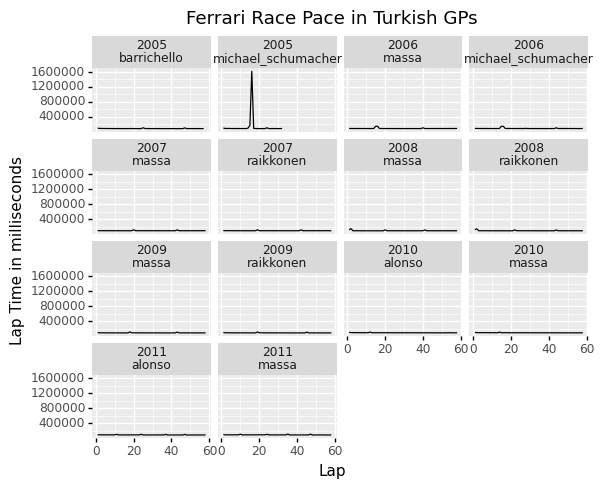

<ggplot: (143985352312)>

In [23]:
(ggplot(ferrari_lap_times)
 + aes(x='lap', y='milliseconds')
 + facet_wrap('~year + driverRef', labeller = "label_parsed")
 + geom_line()
 + labs(title='Ferrari Race Pace in Turkish GPs', x='Lap', y='Lap Time in milliseconds')
)

There are 2 major issues with this plot:
- Firstly: There are obviously a few anomalies in the data set (e.i. lap times that are equivalent to 10-20 minutes): 
        these could be punctures, laps under Safety Car, or more reasonably laps when the car pitted. I will try to remove the most unusual values, and interpolate them, just so I can futher zoom in on the regular lap times.
- Secondly: We need to convert milliseconds to minutes for easier interpretibility of the lap times
        
I will try to fix this now, below.

### Improved Ferrari Race Pace Plots <a class="anchor" id="section_2_2"></a>

In [24]:
lap_times_copy = lap_times_df.copy()

# let's remove the outliers
def remove_outliers(x):
    if x > 150000:   # 2.5 minutes = 150000 milliseconds ... this should be enough to clear anomalies, but not necessarly SC or pit stops
        return np.nan
    else:
        return x

lap_times_copy['milliseconds'] = lap_times_copy.apply(lambda x: remove_outliers(x.milliseconds), axis=1)
lap_times_copy['milliseconds'] = lap_times_copy['milliseconds'].interpolate(method='linear')


# lap_times_copy['time'] is an object -- so it can't be plotted
# lap_times_copy['milliseconds'] is messy to look at, as the numbers are too large
# THEREFORE
# let's create my own timedelta object to plot
lap_times_copy['lap_time'] = pd.to_timedelta(lap_times_copy['milliseconds'], unit="milliseconds")
lap_times_copy

,raceId,driverId,lap,position,time,milliseconds,constructor,constructorId,year,race,driverRef,lap_time
0,84,30,1,11,1:41.057,101057.0,Ferrari,6,2005,Turkish GP 2005,michael_schumacher,0 days 00:01:41.057000
1,84,30,2,11,1:31.056,91056.0,Ferrari,6,2005,Turkish GP 2005,michael_schumacher,0 days 00:01:31.056000
2,84,30,3,12,1:31.362,91362.0,Ferrari,6,2005,Turkish GP 2005,michael_schumacher,0 days 00:01:31.362000
3,84,30,4,12,1:31.285,91285.0,Ferrari,6,2005,Turkish GP 2005,michael_schumacher,0 days 00:01:31.285000
4,84,30,5,11,1:29.795,89795.0,Ferrari,6,2005,Turkish GP 2005,michael_schumacher,0 days 00:01:29.795000
...,...,...,...,...,...,...,...,...,...,...,...,...
7919,844,815,53,15,1:32.515,92515.0,Sauber,15,2011,Turkish GP 2011,perez,0 days 00:01:32.515000
7920,844,815,54,15,1:32.993,92993.0,Sauber,15,2011,Turkish GP 2011,perez,0 days 00:01:32.993000
7921,844,815,55,14,1:33.719,93719.0,Sauber,15,2011,Turkish GP 2011,perez,0 days 00:01:33.719000
7922,844,815,56,13,1:33.159,93159.0,Sauber,15,2011,Turkish GP 2011,perez,0 days 00:01:33.159000


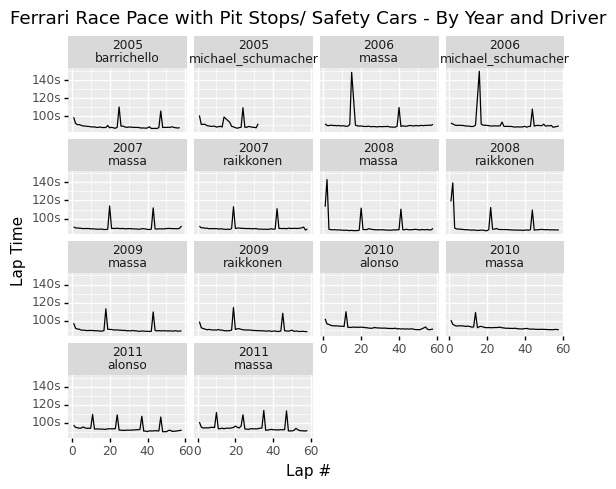

<ggplot: (143989173445)>

In [25]:
ferrari_lap_times = lap_times_copy[lap_times_copy.constructor == "Ferrari"]

(ggplot(ferrari_lap_times)
 + aes(x='lap', y='lap_time')
 + facet_wrap('~year + driverRef', labeller = "label_parsed")
 + geom_line()
 + labs(title='Ferrari Race Pace with Pit Stops/ Safety Cars - By Year and Driver', x='Lap #', y='Lap Time')
)

INTERPRETATION:

- 2005 to 207, and 2009 in was a 2 stopper
- 2008 had either an early pit stop or a Safety Car
- 2010 seems to be a 1 stop
- 2011 seems to be an interesting race with potentially 4 stops. That is odd. Need to double check that.


In [26]:
lap_times_copy.describe()

,raceId,driverId,lap,position,milliseconds,constructorId,year,lap_time
count,7924.000000,7924.000000,7924.000000,7924.000000,7924.000000,7924.000000,7924.000000,7924
mean,224.742176,74.614715,28.394372,10.463402,92290.273536,22.137431,2008.165194,0 days 00:01:32.290273536
std,295.986296,200.729589,16.517652,5.951807,6368.626459,47.872548,2.014173,0 days 00:00:06.368626459
min,7.000000,1.000000,1.000000,1.000000,84770.000000,1.000000,2005.000000,0 days 00:01:24.770000
25%,22.000000,9.000000,14.000000,5.000000,89118.750000,4.000000,2006.000000,0 days 00:01:29.118750
50%,66.000000,17.000000,28.000000,10.000000,90671.000000,6.000000,2008.000000,0 days 00:01:30.671000
75%,343.000000,25.000000,43.000000,15.000000,93128.000000,10.000000,2010.000000,0 days 00:01:33.128000
max,844.000000,816.000000,58.000000,24.000000,149864.000000,205.000000,2011.000000,0 days 00:02:29.864000


This looks good, but it still includes pit stops, punctures, VSC and SC, so I want to also visualize raw race pace, without the laps that are unually slow... just to get a sense of their usual lap times ... I want to zoom in to see in more details what happens with lap times below 102000 milliseconds (1:42 minutes)


The average lap time is 92821, so even with some standard deviation that should be below 102000 milliseconds, so that's how I will filter out outliers.

In [27]:
regular_lap_times = lap_times_df.copy()

# let's try to remove lap times that could be pit stops and safety cars
def remove_more_outliers(x):
    if x > 102000:
        return np.nan
    else:
        return x

regular_lap_times['milliseconds'] = regular_lap_times.apply(lambda x: remove_more_outliers(x.milliseconds), axis=1)
regular_lap_times['milliseconds'] = regular_lap_times['milliseconds'].interpolate(method='linear')


# let's convert milliseconds to my own timedelta object to plot
regular_lap_times['lap_time'] = pd.to_timedelta(regular_lap_times['milliseconds'], unit="milliseconds")
regular_lap_times

,raceId,driverId,lap,position,time,milliseconds,constructor,constructorId,year,race,driverRef,lap_time
0,84,30,1,11,1:41.057,101057.0,Ferrari,6,2005,Turkish GP 2005,michael_schumacher,0 days 00:01:41.057000
1,84,30,2,11,1:31.056,91056.0,Ferrari,6,2005,Turkish GP 2005,michael_schumacher,0 days 00:01:31.056000
2,84,30,3,12,1:31.362,91362.0,Ferrari,6,2005,Turkish GP 2005,michael_schumacher,0 days 00:01:31.362000
3,84,30,4,12,1:31.285,91285.0,Ferrari,6,2005,Turkish GP 2005,michael_schumacher,0 days 00:01:31.285000
4,84,30,5,11,1:29.795,89795.0,Ferrari,6,2005,Turkish GP 2005,michael_schumacher,0 days 00:01:29.795000
...,...,...,...,...,...,...,...,...,...,...,...,...
7919,844,815,53,15,1:32.515,92515.0,Sauber,15,2011,Turkish GP 2011,perez,0 days 00:01:32.515000
7920,844,815,54,15,1:32.993,92993.0,Sauber,15,2011,Turkish GP 2011,perez,0 days 00:01:32.993000
7921,844,815,55,14,1:33.719,93719.0,Sauber,15,2011,Turkish GP 2011,perez,0 days 00:01:33.719000
7922,844,815,56,13,1:33.159,93159.0,Sauber,15,2011,Turkish GP 2011,perez,0 days 00:01:33.159000


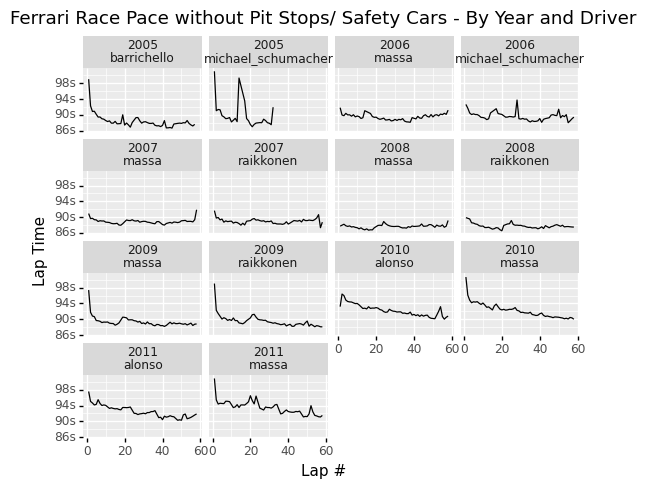

<ggplot: (143989448098)>

In [28]:
ferrari_lap_times = regular_lap_times[regular_lap_times.constructor == "Ferrari"]

(ggplot(ferrari_lap_times)
 + aes(x='lap', y='lap_time')
 + facet_wrap('~year + driverRef', labeller = "label_parsed")
 + geom_line()
 + labs(title='Ferrari Race Pace without Pit Stops/ Safety Cars - By Year and Driver', x='Lap #', y='Lap Time')
)

INTERPRETATION:

- very messy race in 2005, as the race pace for Michael was pretty rough
- good races in 2009, 2010, and 2011, as the lap times were coming down during the race, showing good race pace

Still there is some noise in the data, but that could be looked at based on what happened during the race (e.g. someone going wide)

Let's repear these kids of graphs for other current teams too:
 - McLaren
 - Renault
 - Sauber + BMW Sauber 
 - Williams 
 - Red Bull 
 - Torro Rosso
 - BAR (2005) + Honda (2006-2008) + Brawn (2009) + Mercedes (2010-2011), 
 - Force India 

### McLaren Race Pace Plots <a class="anchor" id="section_2_3"></a>

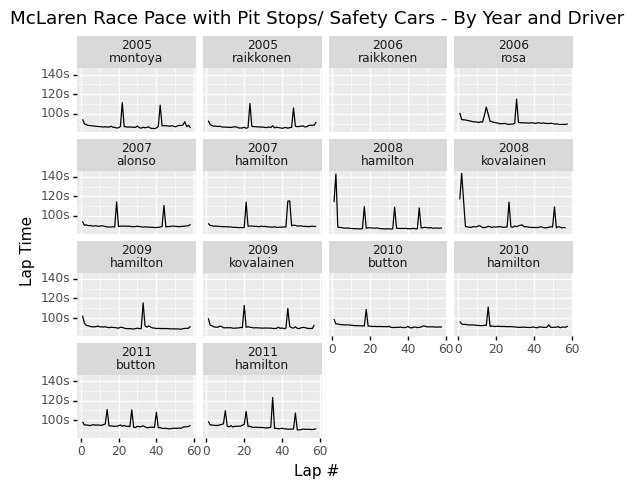

<ggplot: (-9223371892864875839)>

In [29]:
mclaren_lap_times = lap_times_copy[lap_times_copy.constructor == "McLaren"]

(ggplot(mclaren_lap_times)
 + aes(x='lap', y='lap_time')
 + facet_wrap('~year + driverRef', labeller = "label_parsed")
 + geom_line()
 + labs(title='McLaren Race Pace with Pit Stops/ Safety Cars - By Year and Driver', x='Lap #', y='Lap Time')
)

INTERPRETATION:

- 2005 to 2007 was a 2 stopper
- 2006 raikkonen DNS
- 2008 had either an early pit stop or a Safety Car
- 2009 One car 2-stopped, the other car 1-stopped
- 2010 seems to be a 1 stop
- 2011 seems to be an interesting race with potentially 3 stops and a 4 stop


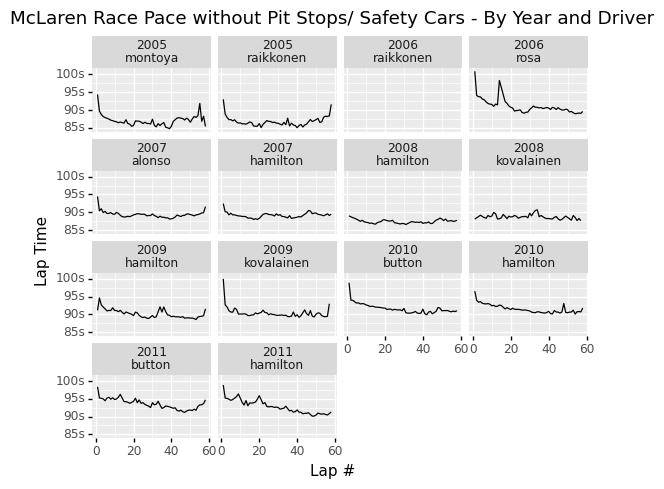

<ggplot: (143989895965)>

In [30]:
mclaren_lap_times = regular_lap_times[regular_lap_times.constructor == "McLaren"]

(ggplot(mclaren_lap_times)
 + aes(x='lap', y='lap_time')
 + facet_wrap('~year + driverRef', labeller = "label_parsed")
 + geom_line()
 + labs(title='McLaren Race Pace without Pit Stops/ Safety Cars - By Year and Driver', x='Lap #', y='Lap Time')
)

INTERPRETATION:

- pretty consistant race pace for all races. Only alomaly seems to be 2005, where their race pace was up and down, getting better, than worse during the race
- very good race pace in 2011, times decresing quite a lot during the race

### Red Bull Race Pace Plots <a class="anchor" id="section_2_4"></a>

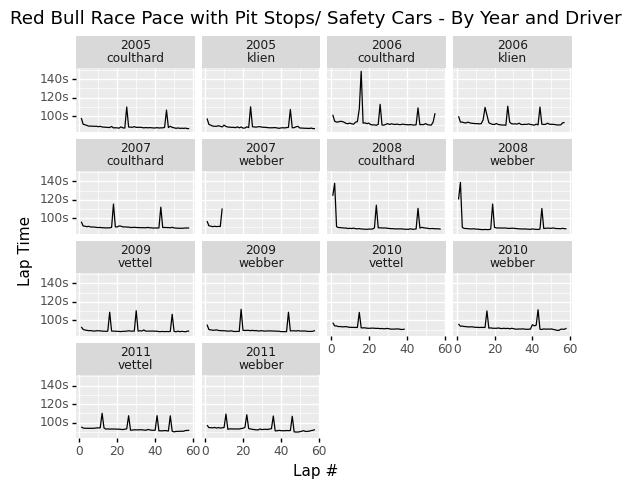

<ggplot: (-9223371892864546318)>

In [31]:
redBull_lap_times = lap_times_copy[lap_times_copy.constructor == "Red Bull"]

(ggplot(redBull_lap_times)
 + aes(x='lap', y='lap_time')
 + facet_wrap('~year + driverRef', labeller = "label_parsed")
 + geom_line()
 + labs(title='Red Bull Race Pace with Pit Stops/ Safety Cars - By Year and Driver', x='Lap #', y='Lap Time')
)

INTERPRETATION:

- 2005 was a 2 stopper
- 2006 was a 3 stopper
- One car retired in 2007
- 2008 had either an early pit stop or a Safety Car at the beginning of the race.
- 2009 split strategy: 2 stop with one car, and 3 stop with the other
- 2010 split strategy: 1 stop with one car, and 2 stop with the other
- 2011 seems to be an interesting race with potentially 4 stops, or less than 4 stops and a Safety car


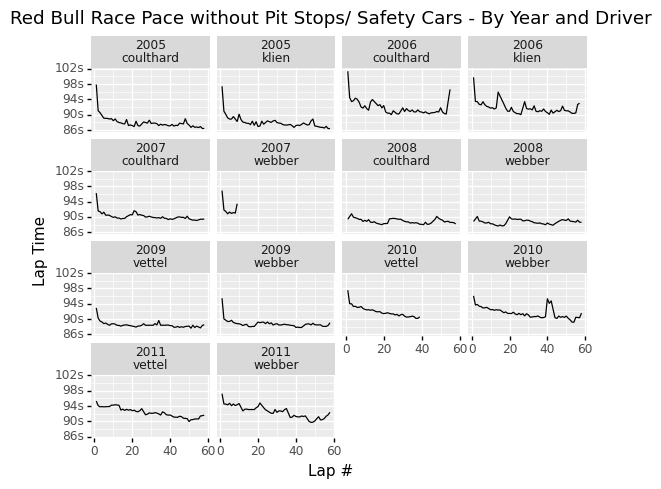

<ggplot: (143989418963)>

In [32]:
redBull_lap_times = regular_lap_times[regular_lap_times.constructor == "Red Bull"]

(ggplot(redBull_lap_times)
 + aes(x='lap', y='lap_time')
 + facet_wrap('~year + driverRef', labeller = "label_parsed")
 + geom_line()
 + labs(title='Red Bull Race Pace without Pit Stops/ Safety Cars - By Year and Driver', x='Lap #', y='Lap Time')
)

INTERPRETATION:

- Messy races both 2005 and 2006
- good race pace in 2010 and 2011

### Renault Race Pace Plots <a class="anchor" id="section_2_5"></a>

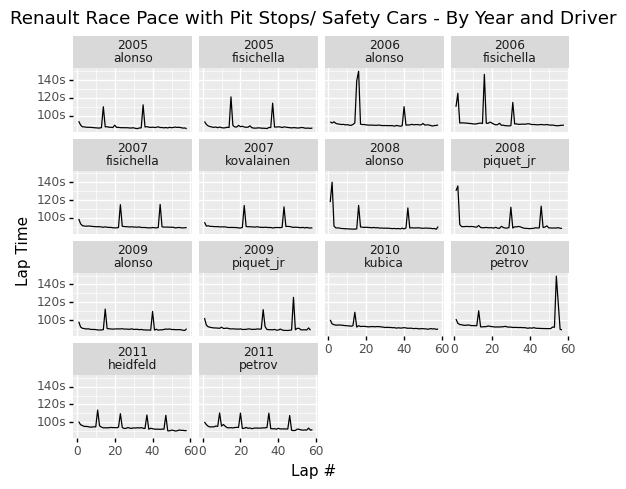

<ggplot: (-9223371892864704540)>

In [33]:
renault_lap_times = lap_times_copy[lap_times_copy.constructor == "Renault"]

(ggplot(renault_lap_times)
 + aes(x='lap', y='lap_time')
 + facet_wrap('~year + driverRef', labeller = "label_parsed")
 + geom_line()
 + labs(title='Renault Race Pace with Pit Stops/ Safety Cars - By Year and Driver', x='Lap #', y='Lap Time')
)

INTERPRETATION:

- 2005 and 2007 was a 2 stopper
- 2006 split strategy: 2 stop with one car, and 3 stop with the other (and early pit stop)
- 2008 had either an early pit stop or a Safety Car at the beginning of the race.
- 2009 split strategy: 2 stop with one car, and 3 stop with the other
- 2010 split strategy: 1 stop with one car, and 2 stop with the other
- 2011 seems to be an interesting race with potentially 4 stops, or less than 4 stops and a Safety car

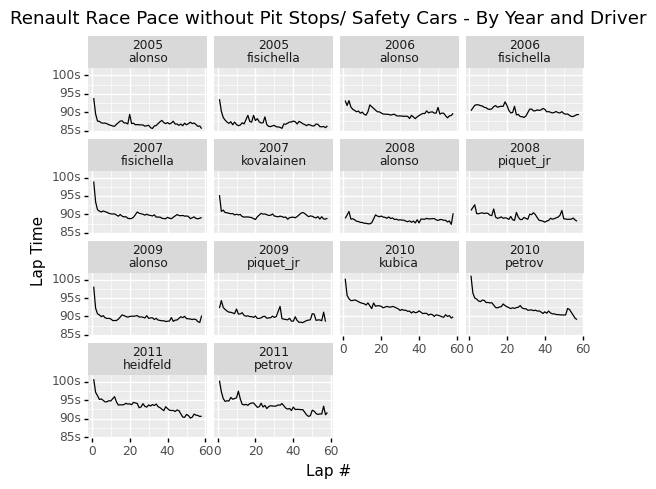

<ggplot: (-9223371892865333532)>

In [34]:
renault_lap_times = regular_lap_times[regular_lap_times.constructor == "Renault"]

(ggplot(renault_lap_times)
 + aes(x='lap', y='lap_time')
 + facet_wrap('~year + driverRef', labeller = "label_parsed")
 + geom_line()
 + labs(title='Renault Race Pace without Pit Stops/ Safety Cars - By Year and Driver', x='Lap #', y='Lap Time')
)

INTERPRETATION:

- really good races for Renault overall, as they kept getting quicker and quicker during each race, especially having a good race in 2011

### Williams Race Pace Plots <a class="anchor" id="section_2_6"></a>

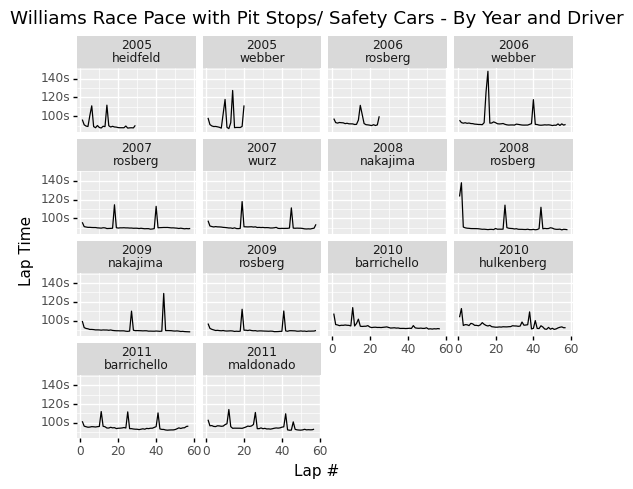

<ggplot: (-9223371892867070050)>

In [35]:
williams_lap_times = lap_times_copy[lap_times_copy.constructor == "Williams"]

(ggplot(williams_lap_times)
 + aes(x='lap', y='lap_time')
 + facet_wrap('~year + driverRef', labeller = "label_parsed")
 + geom_line()
 + labs(title='Williams Race Pace with Pit Stops/ Safety Cars - By Year and Driver', x='Lap #', y='Lap Time')
)

INTERPRETATION:

- 2005 was a messy race, and both cars retired
- 2006 2 stop with one car, while the other car retired
- 2007 was a 2 stopper
- 2008 early pit stop or safety car with one car, while the other car DNF/DNS
- 2009 was a 2 stopper
- 2010 interesting race. Probably 1 stop
- 2011 split strategy: 3stopper and 4 stopper I think

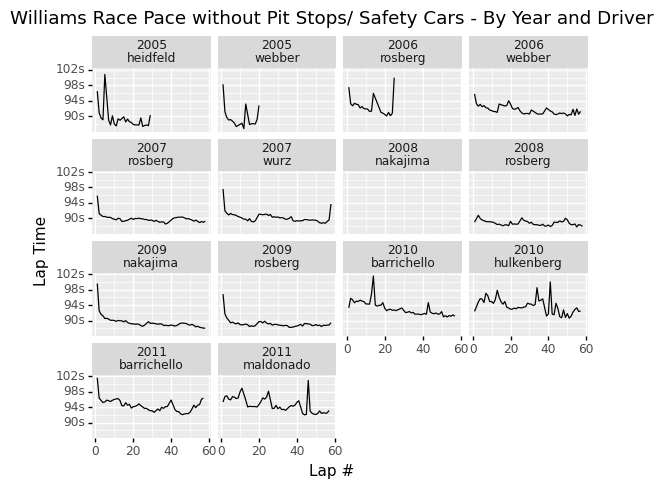

<ggplot: (143989223919)>

In [36]:
williams_lap_times = regular_lap_times[regular_lap_times.constructor == "Williams"]

(ggplot(williams_lap_times)
 + aes(x='lap', y='lap_time')
 + facet_wrap('~year + driverRef', labeller = "label_parsed")
 + geom_line()
 + labs(title='Williams Race Pace without Pit Stops/ Safety Cars - By Year and Driver', x='Lap #', y='Lap Time')
)

INTERPRETATION:

- 2010 was a very odd race, with lap times oscinating too often for Hulkenberg's car

### Toro Rosso Race Pace Plots <a class="anchor" id="section_2_7"></a>

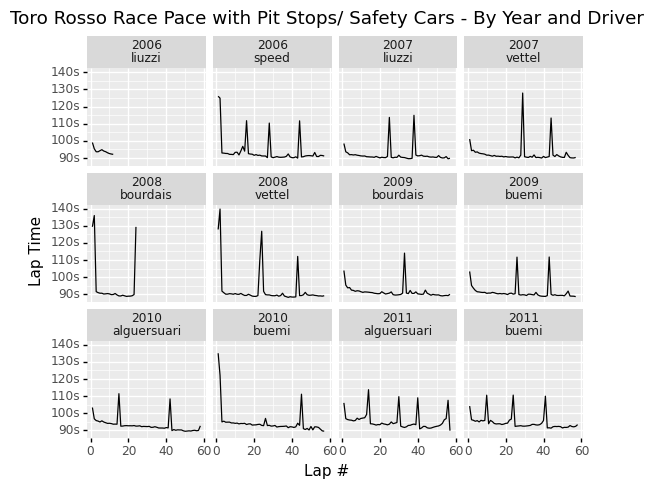

<ggplot: (-9223371892865948700)>

In [37]:
torroRosso_lap_times = lap_times_copy[lap_times_copy.constructor == "Toro Rosso"]

(ggplot(torroRosso_lap_times)
 + aes(x='lap', y='lap_time')
 + facet_wrap('~year + driverRef', labeller = "label_parsed")
 + geom_line()
 + labs(title='Toro Rosso Race Pace with Pit Stops/ Safety Cars - By Year and Driver', x='Lap #', y='Lap Time')
)

INTERPRETATION:

- 2006 messy race: one car retired, other had too many stops
- 2007 was a 2 stopper
- 2008 messy race: one car retired, other car had early pit stop or safety car, then 2 more stops
- 2009 split strategy: 2 stop with one car, and 1 stop with the other
- 2010 was a 2 stopper
- 2011 split strategy: 3 stop with one car, and 4 stop with the other, or less stops and more safety cars

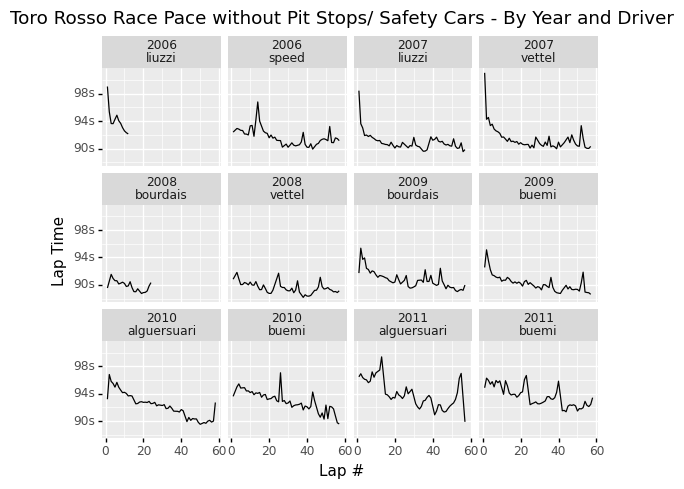

<ggplot: (143989709695)>

In [38]:
torroRosso_lap_times = regular_lap_times[regular_lap_times.constructor == "Toro Rosso"]

(ggplot(torroRosso_lap_times)
 + aes(x='lap', y='lap_time')
 + facet_wrap('~year + driverRef', labeller = "label_parsed")
 + geom_line()
 + labs(title='Toro Rosso Race Pace without Pit Stops/ Safety Cars - By Year and Driver', x='Lap #', y='Lap Time')
)

INTERPRETATION:

- very messy, unpredictable race pace overall for almost all races for Toro Rosso at this track, as their race pace oscilates quite a lot especially during the 2009 and 2011 race
- 2010 race pace was pretty good

### Honda + Brawn + Mercedes Race Pace Plots <a class="anchor" id="section_2_8"></a>

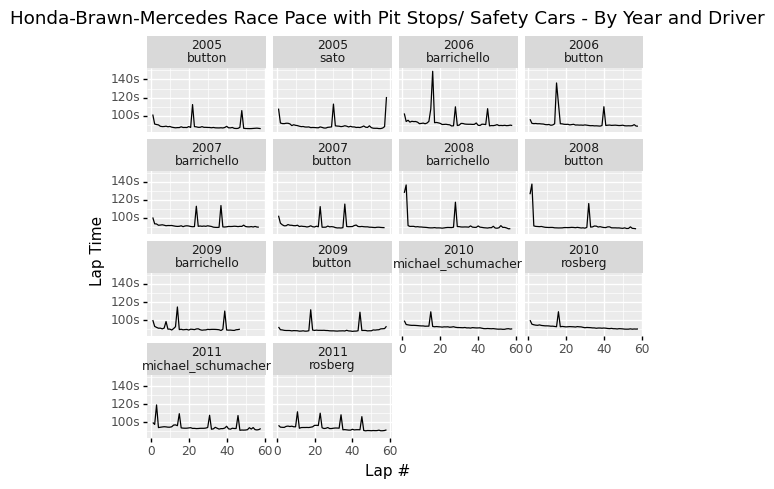

<ggplot: (143988826979)>

In [39]:
mercedes_lap_times = lap_times_copy[lap_times_copy.constructor.isin(["BAR", "Honda", "Brawn", "Mercedes"])]

(ggplot(mercedes_lap_times)
 + aes(x='lap', y='lap_time')
 + facet_wrap('~year + driverRef', labeller = "label_parsed")
 + geom_line()
 + labs(title='Honda-Brawn-Mercedes Race Pace with Pit Stops/ Safety Cars - By Year and Driver', x='Lap #', y='Lap Time')
)

INTERPRETATION:

- 2005 was 2-stopper 
- 2006 messy race: safety car, and 2 stops
- 2007 was a 2 stopper
- 2008 both cars had early pit stop or safety car, then 1 stop only
- 2009 split strategy: 2 stop with one car, and DNF for the other car
- 2010 was a 1 stopper
- 2011 interesting race: 4 stop, or less stops and one or more safety cars

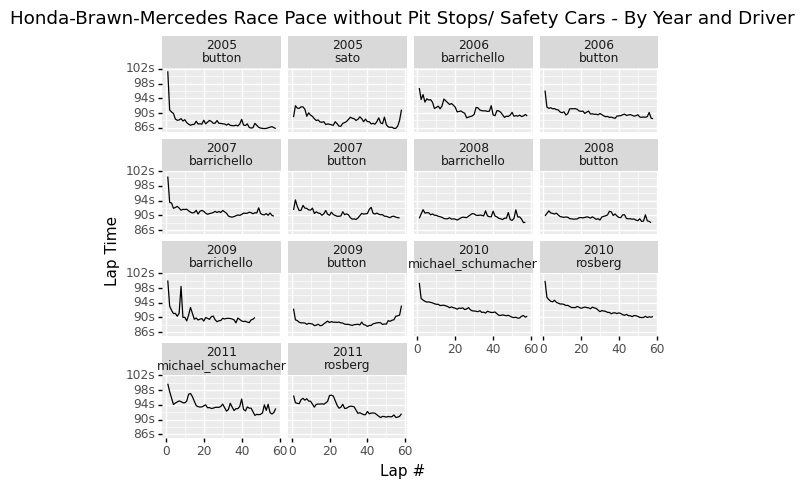

<ggplot: (-9223371892864745198)>

In [40]:
mercedes_lap_times = regular_lap_times[regular_lap_times.constructor.isin(["BAR", "Honda", "Brawn", "Mercedes"])]

(ggplot(mercedes_lap_times)
 + aes(x='lap', y='lap_time')
 + facet_wrap('~year + driverRef', labeller = "label_parsed")
 + geom_line()
 + labs(title='Honda-Brawn-Mercedes Race Pace without Pit Stops/ Safety Cars - By Year and Driver', x='Lap #', y='Lap Time')
)

INTERPRETATION:

- very good race pace in 2010 and 2011 for the team
- 2009 race pace did not look as good as 2010
- races under the Honda team were having quite a lot of oscilations in race pace

### Spyker + Force India Race Pace Plots <a class="anchor" id="section_2_9"></a>

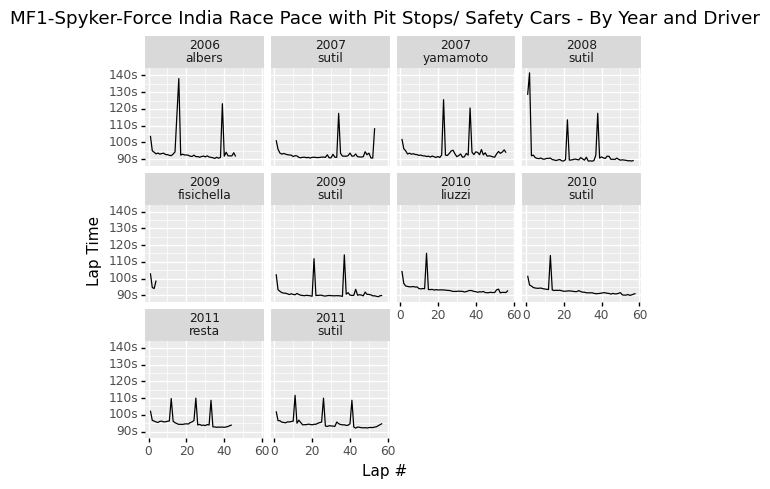

<ggplot: (-9223371892867103109)>

In [41]:
forceIndia_lap_times = lap_times_copy[lap_times_copy.constructor.isin(["MF1", "Spyker MF1","Force India"])]

(ggplot(forceIndia_lap_times)
 + aes(x='lap', y='lap_time')
 + facet_wrap('~year + driverRef', labeller = "label_parsed")
 + geom_line()
 + labs(title='MF1-Spyker-Force India Race Pace with Pit Stops/ Safety Cars - By Year and Driver', x='Lap #', y='Lap Time')
)

INTERPRETATION:

- 2006 seems like only 1 driver competed in the race
- 2007 was a 2 stopper
- 2008 we have data on only 1 car: had early pit stop or safety car, then 2 more stops
- 2009 one car DNF, the other 2 stopped
- 2010 was a 1 stopper
- 2011 3 stopper, and one car retired

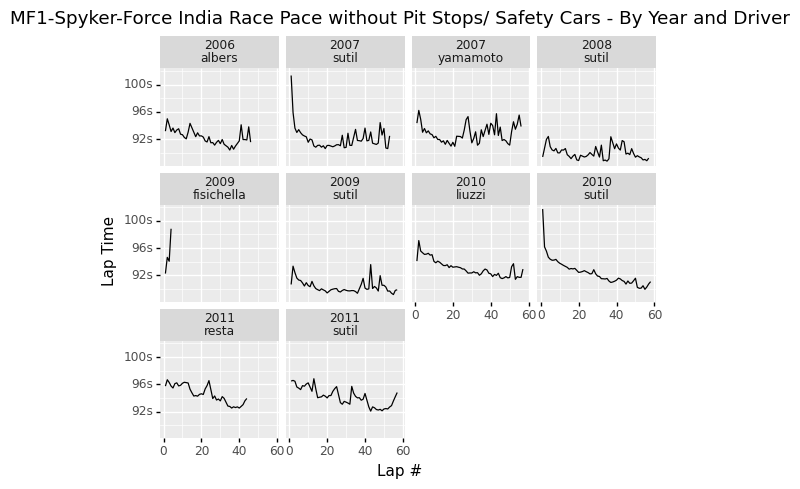

<ggplot: (143989005881)>

In [42]:
forceIndia_lap_times = regular_lap_times[regular_lap_times.constructor.isin(["MF1", "Spyker MF1","Force India"])]

(ggplot(forceIndia_lap_times)
 + aes(x='lap', y='lap_time')
 + facet_wrap('~year + driverRef', labeller = "label_parsed")
 + geom_line()
 + labs(title='MF1-Spyker-Force India Race Pace without Pit Stops/ Safety Cars - By Year and Driver', x='Lap #', y='Lap Time')
)

### Sauber + BMW Sauber Race Pace Plots <a class="anchor" id="section_2_10"></a>

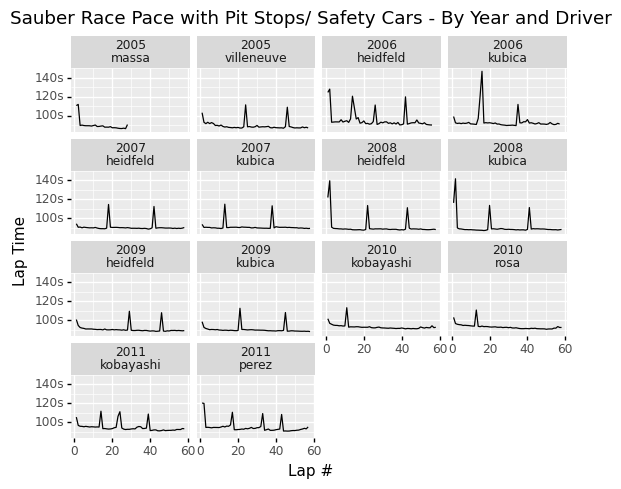

<ggplot: (-9223371892865050557)>

In [43]:
sauber_lap_times = lap_times_copy[lap_times_copy.constructor.isin(["Sauber", "BMW Sauber"])]

(ggplot(sauber_lap_times)
 + aes(x='lap', y='lap_time')
 + facet_wrap('~year + driverRef', labeller = "label_parsed")
 + geom_line()
 + labs(title='Sauber Race Pace with Pit Stops/ Safety Cars - By Year and Driver', x='Lap #', y='Lap Time')
)

INTERPRETATION:

- 2005 one car DNF, other car 2 stopped
- 2006 messy race: one car had 4 stops, other car had 2
- 2007 was a 2 stopper
- 2008 messy race: early safety car, then 2 more stops
- 2009 2 stopper
- 2010 was a 1 stopper
- 2011 split strategy: 3 stop with one car, and 4 stop with the other, or less stops and more safety cars

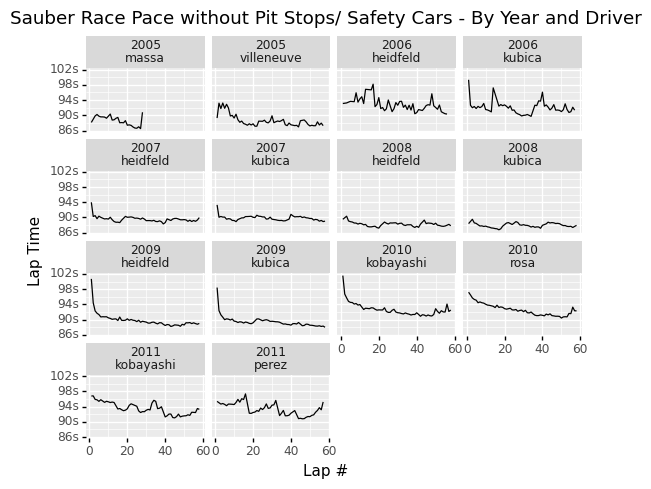

<ggplot: (143989276087)>

In [44]:
sauber_lap_times = regular_lap_times[regular_lap_times.constructor.isin(["Sauber", "BMW Sauber"])]

(ggplot(sauber_lap_times)
 + aes(x='lap', y='lap_time')
 + facet_wrap('~year + driverRef', labeller = "label_parsed")
 + geom_line()
 + labs(title='Sauber Race Pace without Pit Stops/ Safety Cars - By Year and Driver', x='Lap #', y='Lap Time')
)

INTERPRETATION:

- very good race pace in 2009, 2010 and somewhat good in 2011 too
- messy races in 2005 and 2006, as the lap times were oscilating quite a lot